<a href="https://colab.research.google.com/github/DoyulPark/pdm08/blob/master/py-pandas/pandas_4_visualizing_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python module 3. **pandas**

# Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plt로 import
# %matplotlib inline  # work for Jupyter notebook or lab

In [4]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20200928', periods=6)  # 6일 동안의 index를 생성
dates

DatetimeIndex(['2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02', '2020-10-03'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# head()
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))  # 데이터 프레임을 만듬
df

,A,B,C,D
2020-09-28,1.784149,0.661528,-0.860923,0.237545
2020-09-29,-2.810148,0.875390,0.048838,0.085494
2020-09-30,-1.430271,-0.069535,2.094814,0.841728
2020-10-01,2.407884,1.261639,-0.761356,0.017688
2020-10-02,-0.178404,-0.165468,0.514202,1.705688
2020-10-03,-0.851665,-0.559364,-0.249099,-0.452206




---



# 데이터 시각화

#### [도전] 데이터프레임 df의 평균(mean(0))과 표준편차를 이용한 그래프
- 평균에 대한 꺽은선그래프
- 평균과 표준편차를 이용한 막대그래프
> x-축은 A,B,C,D

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


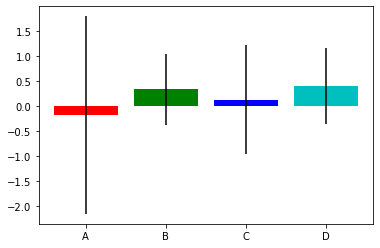

In [6]:
# df의 평균(mean(0))과 표준편차를 이용한 바그래프
bar_labels = df.columns
# plot bars
plt.bar(bar_labels, df.mean(0), yerr=df.std(0), color='rgbcy')
plt.show()  # text 설명이 없어지고 그래프만 보임.

***

## pandas의 데이터 시각화 (Visualization)

In [7]:
df

,A,B,C,D
2020-09-28,1.784149,0.661528,-0.860923,0.237545
2020-09-29,-2.810148,0.875390,0.048838,0.085494
2020-09-30,-1.430271,-0.069535,2.094814,0.841728
2020-10-01,2.407884,1.261639,-0.761356,0.017688
2020-10-02,-0.178404,-0.165468,0.514202,1.705688
2020-10-03,-0.851665,-0.559364,-0.249099,-0.452206


### 꺽은선 그래프

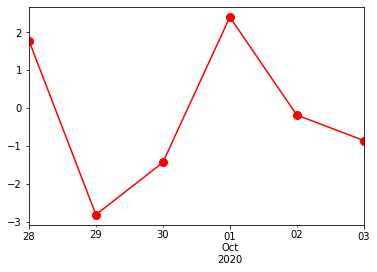

In [8]:
df['A'].plot(marker='o', c='r', ms=8) # 'A열'  마크는 o, 색상은 red, 마크 size = 8

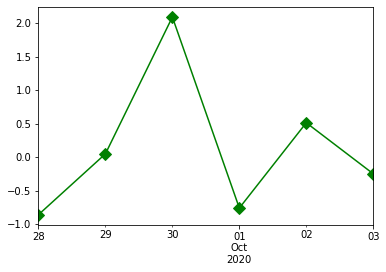

In [9]:
df['C'].plot(marker='D', c='g', ms=8)  # set figsize 'B열'

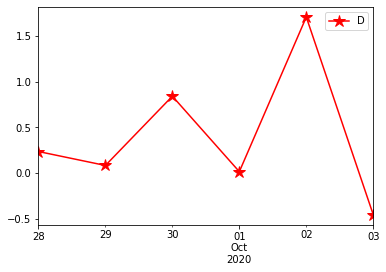

In [10]:
df.plot(y='D', marker='*', c='r', ms=12)   # x-축은 날짜인덱스 y = 'D'는 'D'열을 의미 -> (특정 열을 뽑는 또 다른 방법)

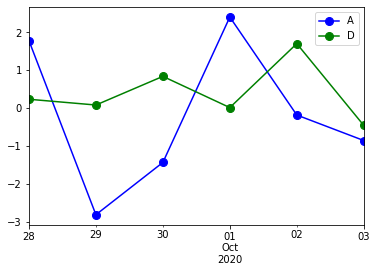

In [11]:
# 두 개의 그래프를 한 축에 그리기
# df['A','D'].plot(marker='o', c='r', ms=8) # 오류가 뜨는데 이 코드는 두개다 뽑지 못함. 밑의 코드로 해결 가능.
df[['A','D']].plot(marker='o', color='bg', ms=8)  # works!, change colors (대괄호로 두번 묶어 주어야지 두개를 뽑을 수 있음.)
# 두개 이상의 그래프를 다른 색깔로 그리고 싶으면 "color"라는 속성에 두개의 색을 지정해 주어야함.

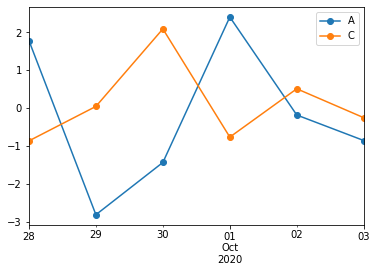

In [12]:
df.plot(y=['A','C'], marker='o')  
# 동시에 리스트로 한 묶음 해서 뽑아내면 하나의 axis에 그려짐, color를 지정을 안하면 자동으로 선택이 되어서 그려짐.

### 산포도 (Scatter graph)
-> 서로서로 어떤 식으로 관련되어서 분포하느냐

In [13]:
df

,A,B,C,D
2020-09-28,1.784149,0.661528,-0.860923,0.237545
2020-09-29,-2.810148,0.875390,0.048838,0.085494
2020-09-30,-1.430271,-0.069535,2.094814,0.841728
2020-10-01,2.407884,1.261639,-0.761356,0.017688
2020-10-02,-0.178404,-0.165468,0.514202,1.705688
2020-10-03,-0.851665,-0.559364,-0.249099,-0.452206


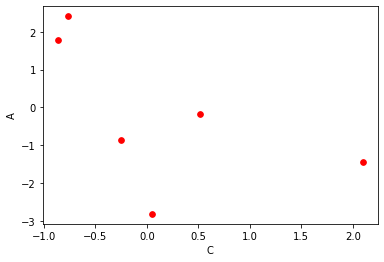

In [14]:
df.plot(kind='scatter',x='C',y='A', color='r', marker='o', s=32) 
# 데이터가 작아서 관련성을 찾기가 어려움.

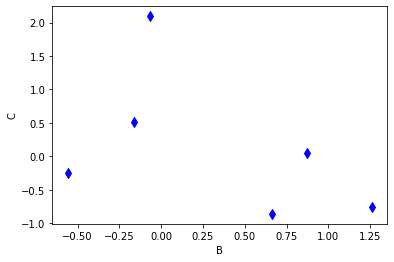

In [15]:
df.plot(kind='scatter',x='B',y='C', color='blue', marker='d', s=50)  

### 바 그래프

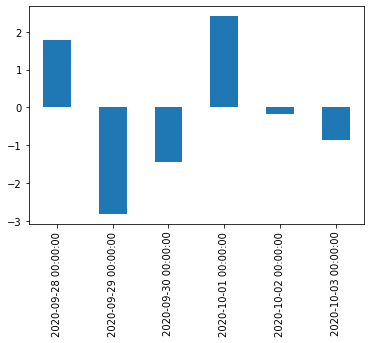

In [16]:
df['A'].plot.bar()  # A열의 바 그래프

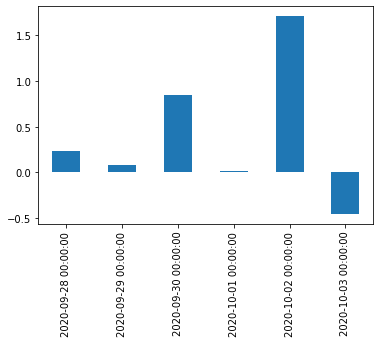

In [17]:
df['D'].plot.bar()  # D열의 바 그래프

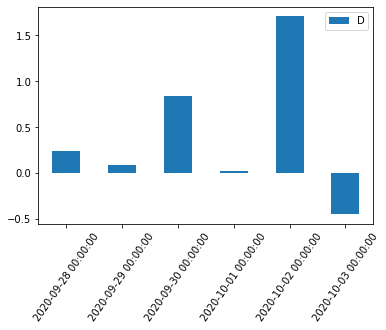

In [18]:
df.plot(kind='bar', y='D', rot=55)  
# rot라는 속성을 추가하면 x축의 label값들이 75도 각도로 변함.

#### 다중 바그래프

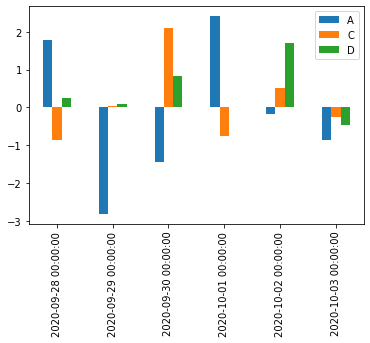

In [19]:
df.plot(kind='bar',y=['A','C','D']) # 세개의 열에 대한 바 그래프(리스트로 묶음)

#### 평균/표준편차 그래프

In [20]:
df.mean(0), df.std(0), df.columns # 열 방향으로 평균, 표준편차를 구함.

(A   -0.179743
 B    0.334032
 C    0.131079
 D    0.405989
 dtype: float64, A    1.974184
 B    0.703036
 C    1.089481
 D    0.761243
 dtype: float64, Index(['A', 'B', 'C', 'D'], dtype='object'))

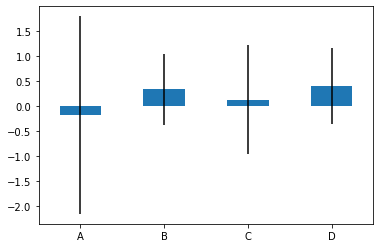

In [21]:
# plot bars
# bar_labels = df.columns
# plt.bar(bar_labels, df.mean(0), yerr=df.std(0))
df.mean(0).plot.bar(yerr=df.std(0), rot=0) # 원래 x축의 label이 가로로 있었는데 rot를 사용해서 세로로 글자를 돌려줌.



---



### 그래프 이어 그리기

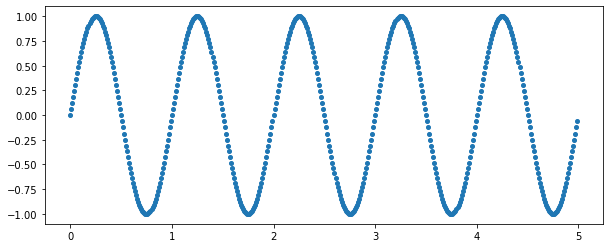

In [22]:
x1 = np.arange(0.0, 5.0, 0.01)  # 0부터 5까지 
y1 = np.sin(2*np.pi*x1) # sin2pi x1 값
plt.figure(figsize=(10,4))  # 가로로 10, 세로로 4비율
plt.plot(x1, y1, 'o', ms = 4)

In [23]:
x1.shape, y1.shape  # 길이가 500인 일반 벡터

((500,), (500,))

#### pandas 데이터프레임을 이용한 그래프 

In [24]:
df = pd.DataFrame(dict(sine=y1), index=x1, columns=['sine'])  
# dict에 key값을 할당해주고, index를 설정, columns 이름을 sine으로 
df.head()

,sine
0.00,0.000000
0.01,0.062791
0.02,0.125333
0.03,0.187381
0.04,0.248690


In [25]:
df.tail() # 5는 포함 x

,sine
4.95,-0.309017
4.96,-0.248690
4.97,-0.187381
4.98,-0.125333
4.99,-0.062791


In [26]:
len(df)

500

In [27]:
pre_size = int(len(df) * 0.8) # 500의 앞부분 80%, 뒤에는 20%
post_size = len(df) - pre_size
pre, post = df.iloc[0:pre_size], df.iloc[pre_size:len(df)]
print(len(pre), len(post))

400 100


In [28]:
post.shape 

(100, 1)

In [29]:
post2 = post + np.random.normal(scale=0.2, size=len(post)).reshape(-1,1)
# 가우시안 잡음을 만들어서 post 개수만큼 만듬 잡음을 (100, 1) 형태로 맞춰줌. -> 20% 가우시안 잡음을 넣어줌.

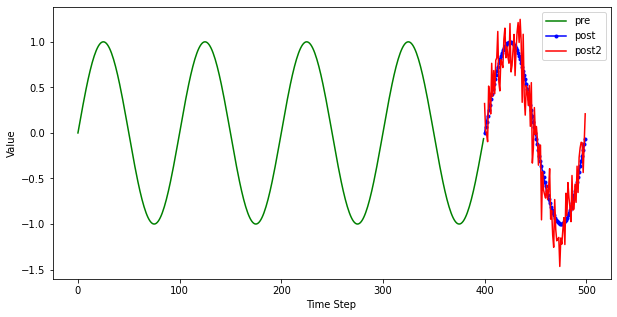

In [31]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, len(pre)), pre, 'g', label="pre")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")
# 뒷부분 20%를 blue로
plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2")
# 잡음이 들어간 sin 함수로 그리고 색상은 red로
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

#### post  post2를 동시에 그려서 두 그래프를 비교해보시오. 

- subplot 사용
- 위, 아래로 그려서 비교

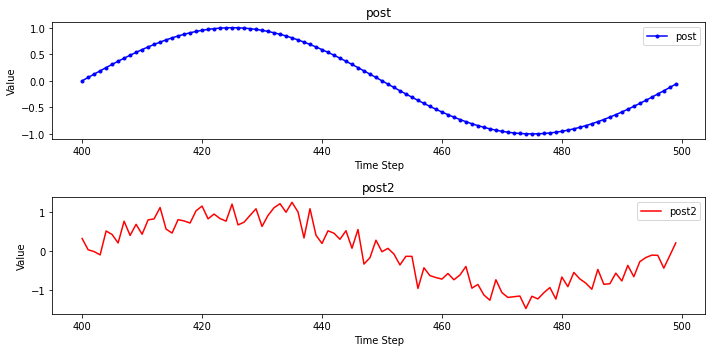

In [32]:
plt.figure(figsize=(10,5))

plt.subplot(211).set_title('post')  # 제목 설정
plt.xlabel('Time Step') # post x label
plt.ylabel('Value') # post y label
plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")
plt.legend()

plt.subplot(212).set_title('post2') # 제목 설정
plt.ylabel('Value') # post2 x label
plt.xlabel('Time Step') # post2 y label
plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2")
plt.legend()

plt.tight_layout()  # 그래프 간격 조절
plt.show()